<a href="https://colab.research.google.com/github/trishaladas/Biomarker_signatures/blob/main/CancerSEEK_ClinicalPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
#data cleaning and manipulation
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

In [ ]:
df = pd.read_excel('/content/drive/My Drive/cancerseek_data/cancerseek_clinical.xlsx')
df

,Patient ID #,Plasma sample ID #,Primary tumor sample ID #,Age,Sex,Race,Tumor type,AJCC Stage,Histopathology,Plasma volume (mL),Plasma DNA concentration (ng/mL),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,NL 1631,NL PLSA 1631,Not applicable,63.000000,Female,Caucasian,Normal,NaN,NaN,7.5,0.001088,0.071218,Negative
1,NL 1629,NL PLSA 1629,Not applicable,60.000000,Female,Black,Normal,NaN,NaN,7.5,0.001344,0.145513,Negative
2,NL 1626,NL PLSA 1626,Not applicable,73.000000,Female,Caucasian,Normal,NaN,NaN,7.5,0.001802,0.062389,Negative
3,NL 1628,NL PLSA 1628,Not applicable,76.000000,Female,Caucasian,Normal,NaN,NaN,7.5,0.001884,0.063994,Negative
4,NL 1630,NL PLSA 1630,Not applicable,71.000000,Male,Asian,Normal,NaN,NaN,7.5,0.001921,0.070883,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,INDI 847,INDI 847 PLS 1,INDI 847 PT1,51.000000,Female,Asian,Liver,III,Hepatocellular carcinoma,7.5,113.590711,0.942521,Positive
1813,INDI 308,INDI 308 PLS 1,INDI 308 PT1,39.000000,Male,Asian,Liver,II,Hepatocellular carcinoma,7.5,119.547923,0.997765,Positive
1814,INDI 147,INDI 147 PLS 1,INDI 147 PT1,62.000000,Female,Asian,Stomach,II,Adenocarcinoma,7.5,126.951127,0.999680,Positive
1815,†LCR 762,LCR 762 PLS1,Not applicable,73.350791,Male,Caucasian,Normal,NaN,NaN,7.5,135.665314,0.164110,Negative


Text(0, 0.5, 'Count')

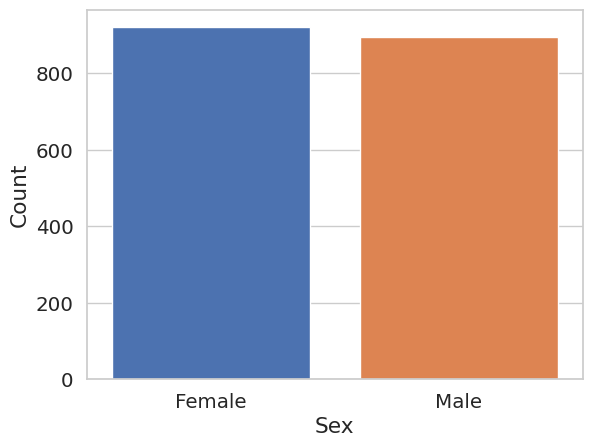

In [ ]:

sns.countplot(df, x="Sex", hue= df['Sex'], saturation=1)
plt.ylabel("Count")

<Axes: >

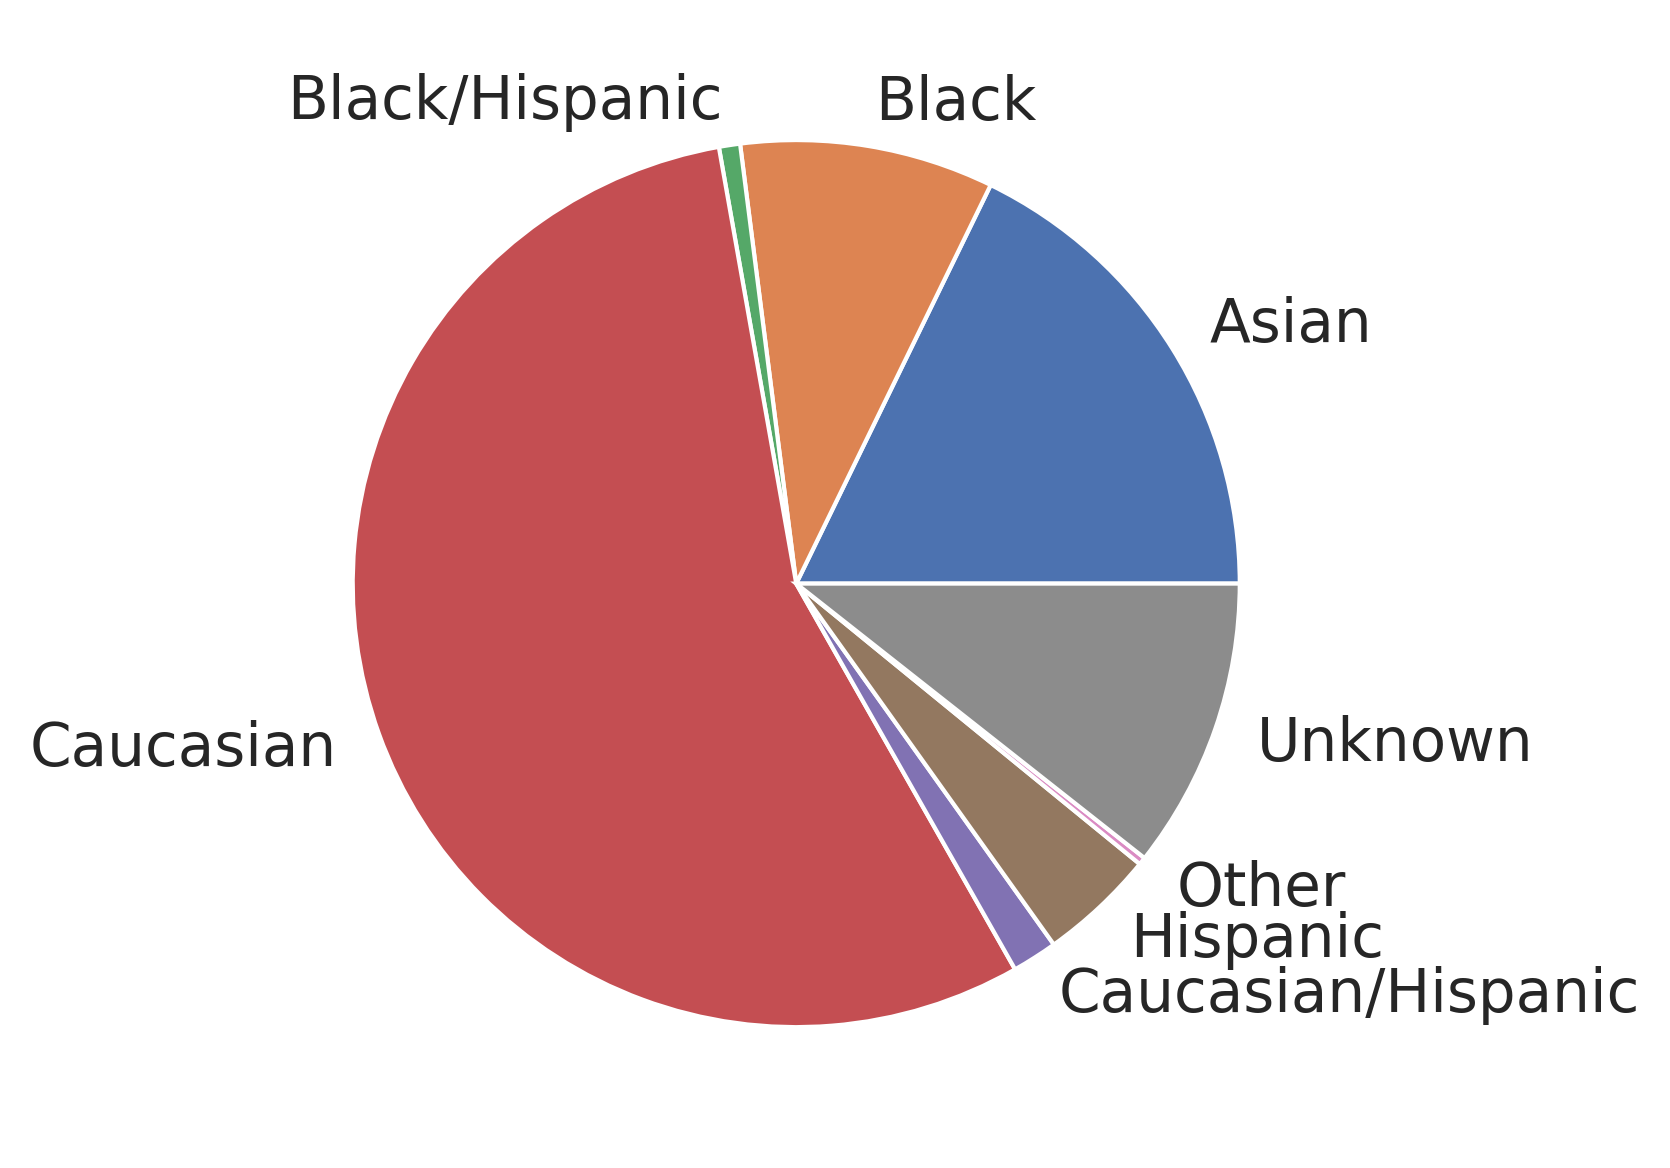

In [ ]:
plt.figure(dpi=300)
df.groupby('Race').size().plot(kind='pie')


In [ ]:
df.groupby('Race').size()

Race
Asian                  323
Black                  168
Black/Hispanic          14
Caucasian             1007
Caucasian/Hispanic      30
Hispanic                77
Other                    5
Unknown                193
dtype: int64

In [ ]:
df

,Patient ID #,Plasma sample ID #,Primary tumor sample ID #,Age,Sex,Race,Tumor type,AJCC Stage,Histopathology,Plasma volume (mL),Plasma DNA concentration (ng/mL),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,NL 1631,NL PLSA 1631,Not applicable,63.000000,Female,Caucasian,Normal,NaN,NaN,7.5,0.001088,0.071218,Negative
1,NL 1629,NL PLSA 1629,Not applicable,60.000000,Female,Black,Normal,NaN,NaN,7.5,0.001344,0.145513,Negative
2,NL 1626,NL PLSA 1626,Not applicable,73.000000,Female,Caucasian,Normal,NaN,NaN,7.5,0.001802,0.062389,Negative
3,NL 1628,NL PLSA 1628,Not applicable,76.000000,Female,Caucasian,Normal,NaN,NaN,7.5,0.001884,0.063994,Negative
4,NL 1630,NL PLSA 1630,Not applicable,71.000000,Male,Asian,Normal,NaN,NaN,7.5,0.001921,0.070883,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,INDI 847,INDI 847 PLS 1,INDI 847 PT1,51.000000,Female,Asian,Liver,III,Hepatocellular carcinoma,7.5,113.590711,0.942521,Positive
1813,INDI 308,INDI 308 PLS 1,INDI 308 PT1,39.000000,Male,Asian,Liver,II,Hepatocellular carcinoma,7.5,119.547923,0.997765,Positive
1814,INDI 147,INDI 147 PLS 1,INDI 147 PT1,62.000000,Female,Asian,Stomach,II,Adenocarcinoma,7.5,126.951127,0.999680,Positive
1815,†LCR 762,LCR 762 PLS1,Not applicable,73.350791,Male,Caucasian,Normal,NaN,NaN,7.5,135.665314,0.164110,Negative


In [ ]:
counts= df['Tumor type'].value_counts().sort_values(ascending=False)

Text(0.5, 0, 'Class')

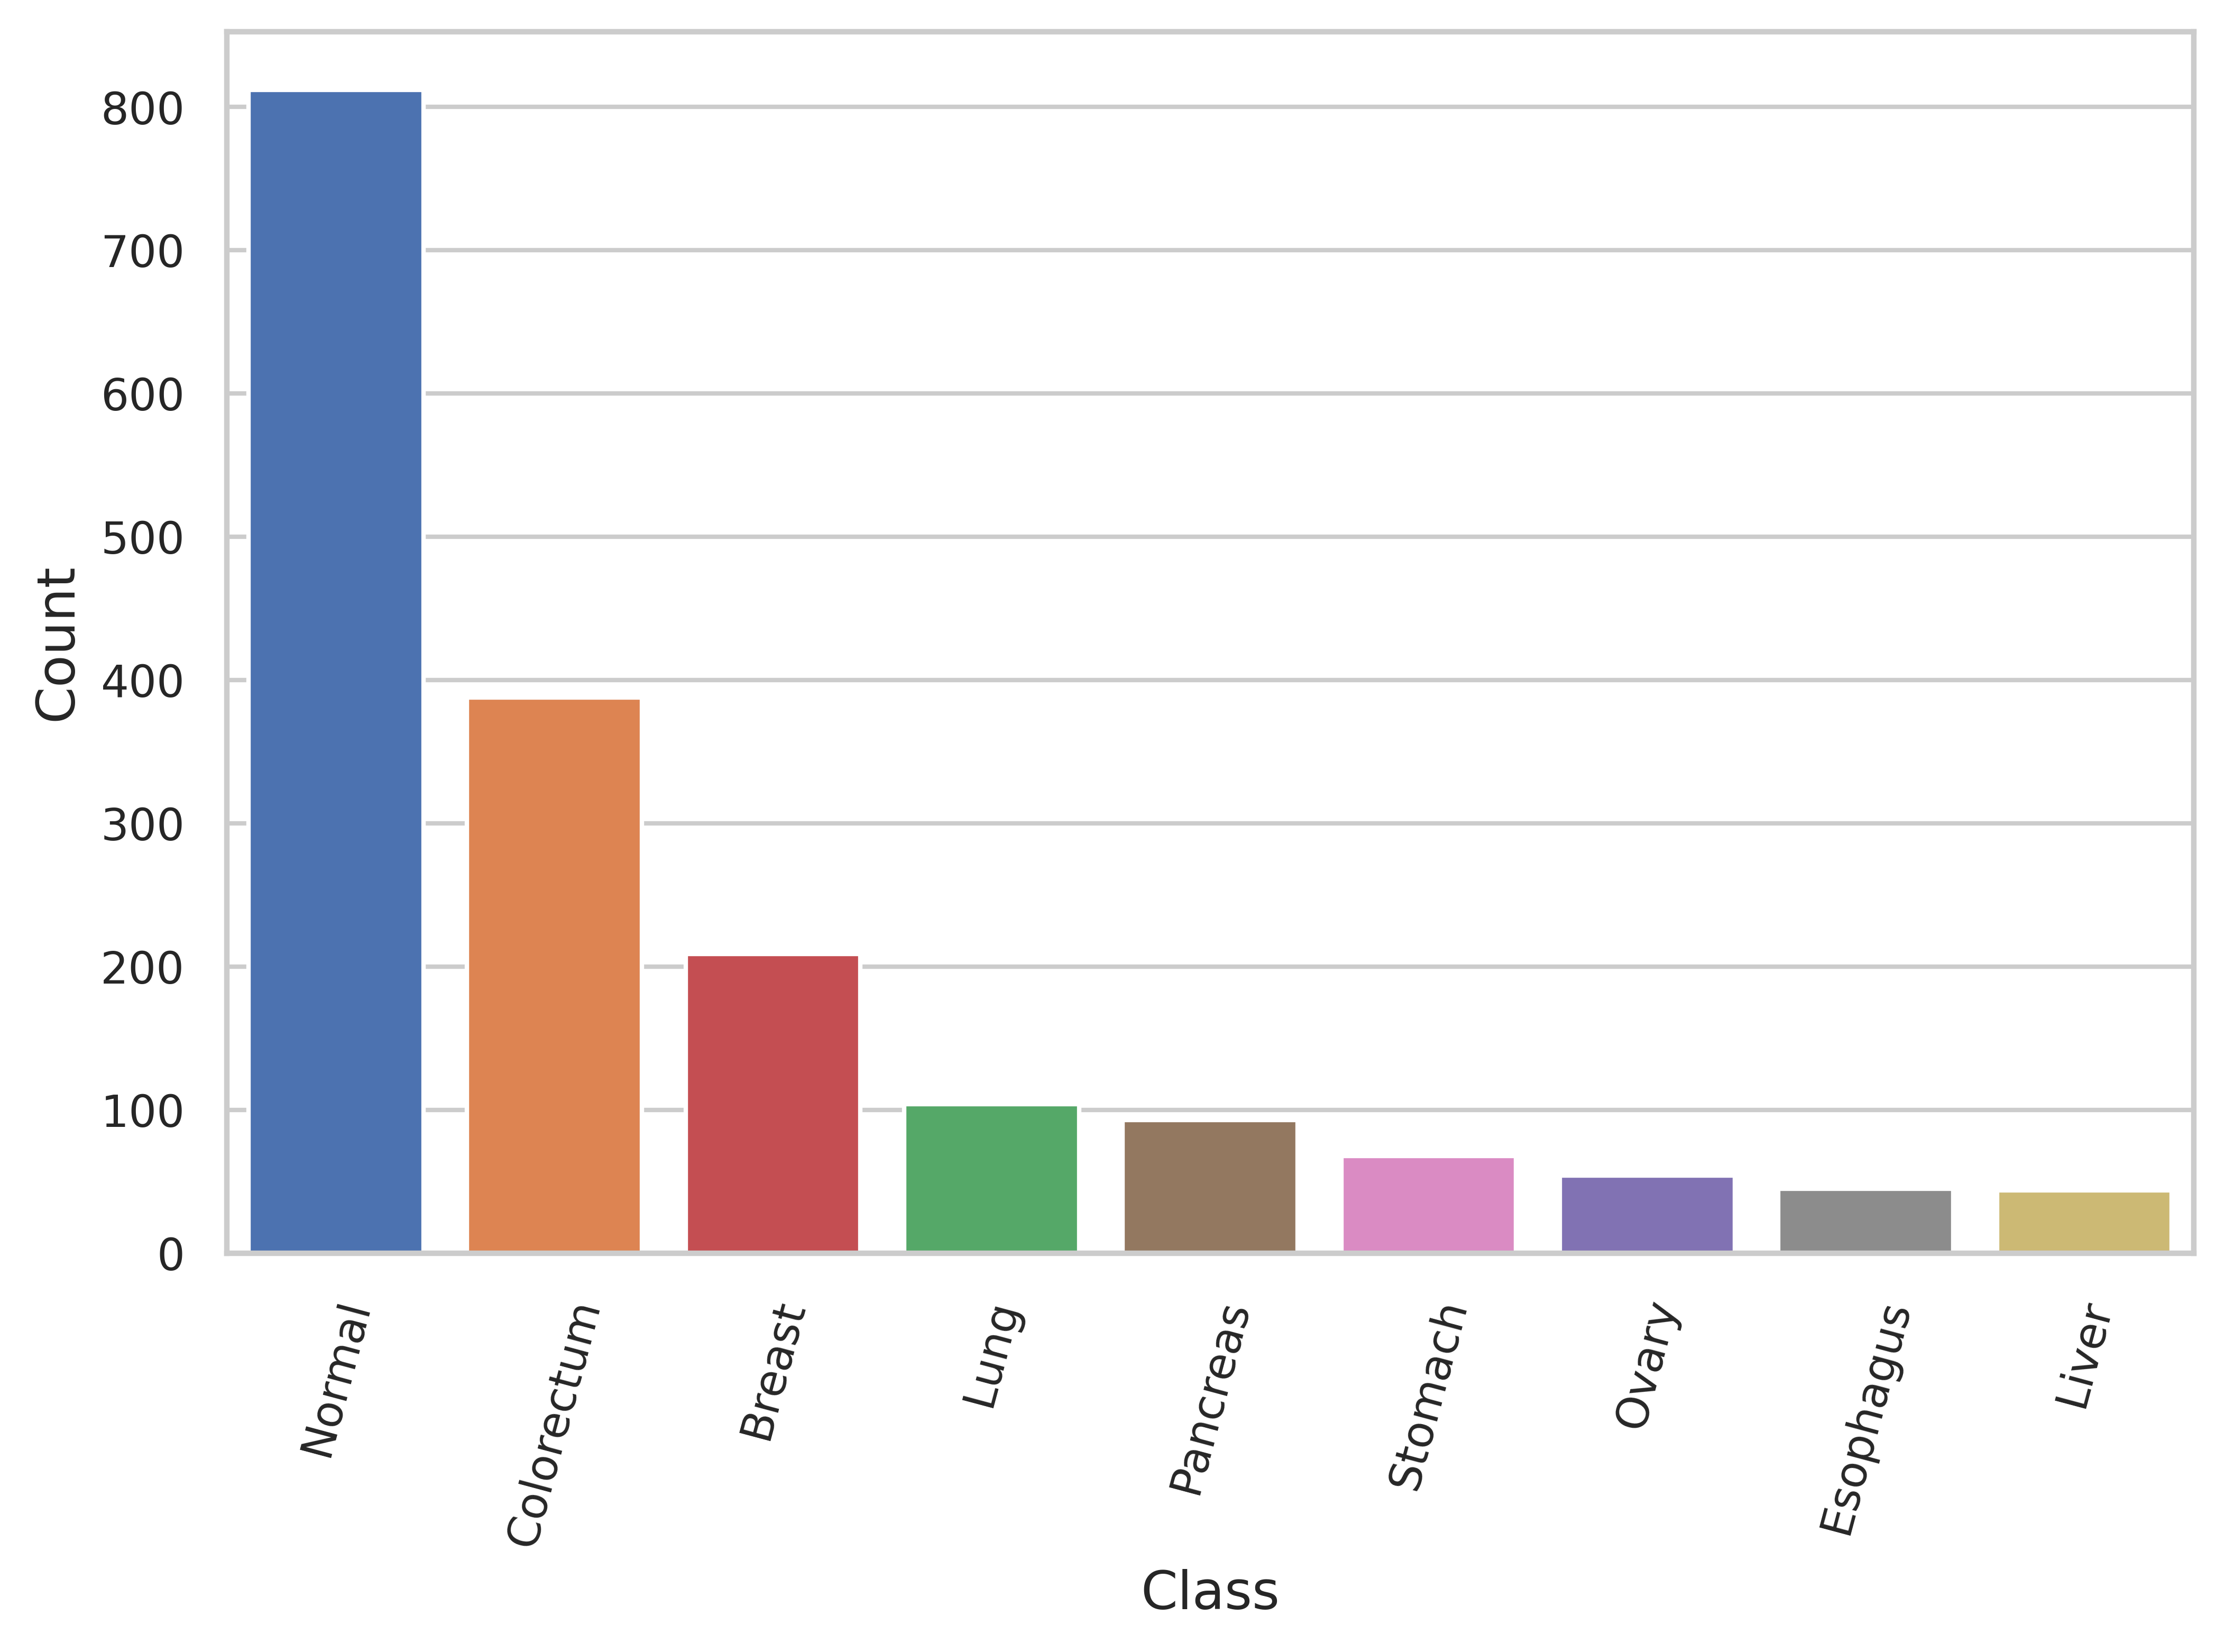

In [ ]:
plt.figure(figsize=(8,5), dpi=600)
sns.countplot(df, x="Tumor type", hue= df['Tumor type'], saturation=1, order=counts.index)
plt.xticks(rotation=75)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Class",fontsize=12)

In [ ]:
value_counts = df['Tumor type'].value_counts()
value_counts

Tumor type
Normal        812
Colorectum    388
Breast        209
Lung          104
Pancreas       93
Stomach        68
Ovary          54
Esophagus      45
Liver          44
Name: count, dtype: int64